In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("Titanic.csv",encoding = "ISO-8859-1") #"utf-8"

In [3]:
len(df.columns)

12

In [4]:
df_copy=df.copy()

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## include=['O']

In [7]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Banfield, Mr. Frederick James",male,347082,B96 B98,S
freq,1,577,7,4,644


## Drop useless columns

In [8]:
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [9]:
len(df.columns)

9

## Drop null values

In [10]:
df=df.dropna()

In [11]:
df.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
885,886,0,3,female,39.0,0,5,29.125,Q
886,887,0,2,male,27.0,0,0,13.000,S
887,888,1,1,female,19.0,0,0,30.000,S
889,890,1,1,male,26.0,0,0,30.000,C
890,891,0,3,male,32.0,0,0,7.750,Q


## Viewing data relationships

### Pclass and Survived using GROUPBY

In [12]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).sum()

,Pclass,Survived
0,1,120
1,2,83
2,3,85


In [13]:
df.Pclass.unique()

array([3, 1, 2])

In [14]:
df[df["Pclass"]==1]["Survived"].sum()

120

## Sex and Survived GROUPBY

In [15]:
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.752896
1,male,0.205298


#### ==> female min3ou akther !

## Visualtion of sex

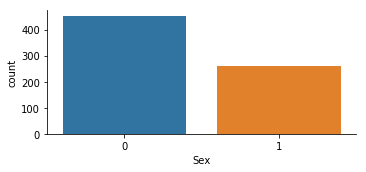

In [26]:
g = sns.catplot("Sex",data=df[df.Sex.notnull()],
                  kind="count", height=2.5, aspect=2)

## Correlating numerical features

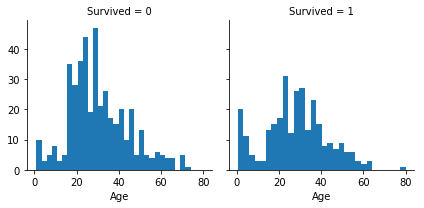

In [16]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=30)

## Correlating numerical and ordinal features

### Age Pclass Survived

/home/helmi/.local/lib/python3.5/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


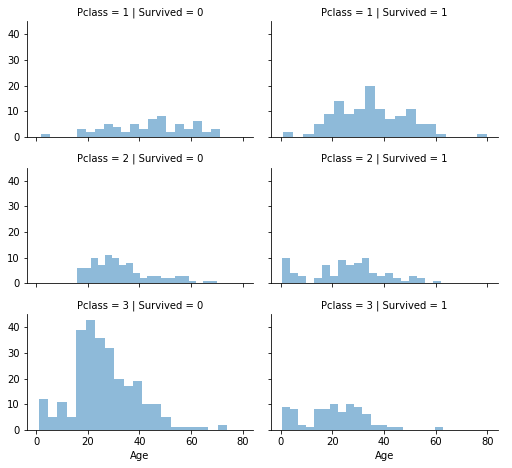

In [17]:
grid = sns.FacetGrid(df, col='Survived', 
    row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

### Embarked Sex Fare Survived

/home/helmi/.local/lib/python3.5/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


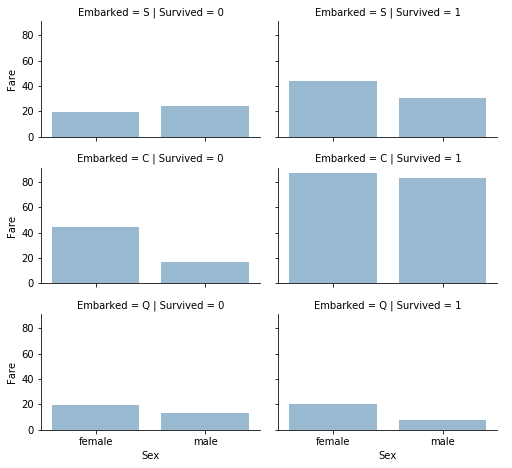

In [18]:
grid = sns.FacetGrid(df, row='Embarked', 
    col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, 
    ci=None)
grid.add_legend()

# Correlation

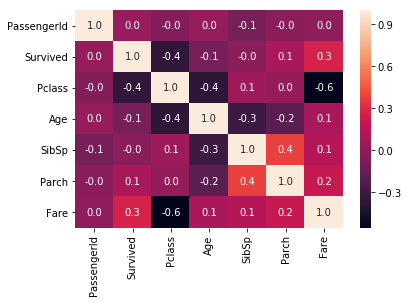

In [19]:
sns.heatmap(df.corr(), annot=True, fmt=".1f")

# Converting a categorical feature

### This is required by most model algorithms.

In [20]:
df['Sex'] = df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S


In [21]:
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [22]:
#df['Embarked'] = df['Embarked'].map( {'S': 0, 'C': 1,'Q':2} ).astype(int)
#df.head()

In [23]:
def change_embarked(emb):
    if emb=="S":
        return 0
    if emb=="C":
        return 1
    if emb =="Q":
        return 2

In [24]:
df["Embarked"]=df["Embarked"].apply(change_embarked)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0
